## Image Processing - SCC0251

### Assignment 2 - Enhancement and Filtering
Author: Gabriel R. do P. Rossales

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
# Performs normalization to  0-255
# Params:
#   img: ndarray - 2d image
def normalize(img):
    return (img - np.amin(img)) * 255 / (np.amax(img)-np.amin(img)) 


# Perform gaussian filter
# Params:
#   x: float - euclidean distance from origin
#   sigma: float - standard deviation of gaussian distribution
def gaussianKernel(x, sigma):
    return np.exp(-(x ** 2) / (2 * (sigma ** 2)))/ (2 * np.pi * (sigma ** 2))


# Perform bilateral filter
# Params:
#   img: ndarray - 2d image
#   n: int - filter size
#   sigma_row: float - standard deviation of gaussian filter for columns
#   sigma_col: float - standard deviation of gaussian filter for columns
def bilateralFilter(img, n, sigma_s, sigma_r):
    spatial_component = np.array(
        [[gaussianKernel(np.linalg.norm((i, j)), sigma_s) for j in range(1 + (-n // 2), 1 + n // 2)] for i in
         range(1 + (-n // 2), 1 + n // 2)])
    if n%2 == 1:
        padded = np.pad(img, n//2, 'constant')
        center = n//2
    else:
        padded = np.pad(img, ((n//2 -1,n//2),(n//2 -1,n//2)), 'constant')
        center = n//2 -1
    I = []
    for i in range(padded.shape[0] - (n-1)):
        for j in range(padded.shape[1] - (n-1)):
            subMatrix = padded[i:i+n, j:j+n]
            gs = spatial_component
            gr = np.array([gaussianKernel(x, sigma_r) for x in (subMatrix-np.ones((n, n))*subMatrix[center, center])])
            w = gs*gr
            I.append(np.sum(subMatrix*w)/np.sum(w))
    return np.array(I).reshape(img.shape)


# Perform unsharpen mask
# Params:
#   img: ndarray - 2d image
#   c: float - filter weight
#   kernel: ndarray - 3x3
def unsharpenMask(img, c, kernel):
    padded = np.pad(img, 1, 'constant')
    l = []
    for i in range(padded.shape[0] - 2):
        for j in range(padded.shape[1] - 2):
            l.append(np.sum(padded[i:i + 3, j:j + 3] * kernel))
    convoluted = np.array(l).reshape(img.shape)
    scaled = normalize(convoluted)
    added = c * scaled + img
    return normalize(added)


# Perform vignette
# Params:
#   img: ndarray - 2d image
#   sigma_row: float - standard deviation of gaussian filter for rows
#   sigma_col: float - standard deviation of gaussian filter for columns
def vignette(img, sigma_row, sigma_col):
    w_row = np.array([gaussianKernel(x, sigma_row) for x in range(1 + (-img.shape[0] // 2), 1 + (img.shape[0] // 2))])
    w_col = np.array([gaussianKernel(x, sigma_col) for x in range(1 + (-img.shape[1] // 2), 1 + (img.shape[1] // 2))])
    kernel = w_col * w_row.reshape(img.shape[0], 1)
    filtered = kernel * img
    return normalize(filtered)


# Perform root squared error calculation
# Params:
#   m - ndarray - 2d image - modified image
#   r - ndarray - 2d image - reference image
def RSE(m, r):
    err = np.sqrt(np.sum(np.square(m.astype(float) - r.astype(float))))
    return err

### Example - Bilateral filter

(-0.5, 149.5, 149.5, -0.5)

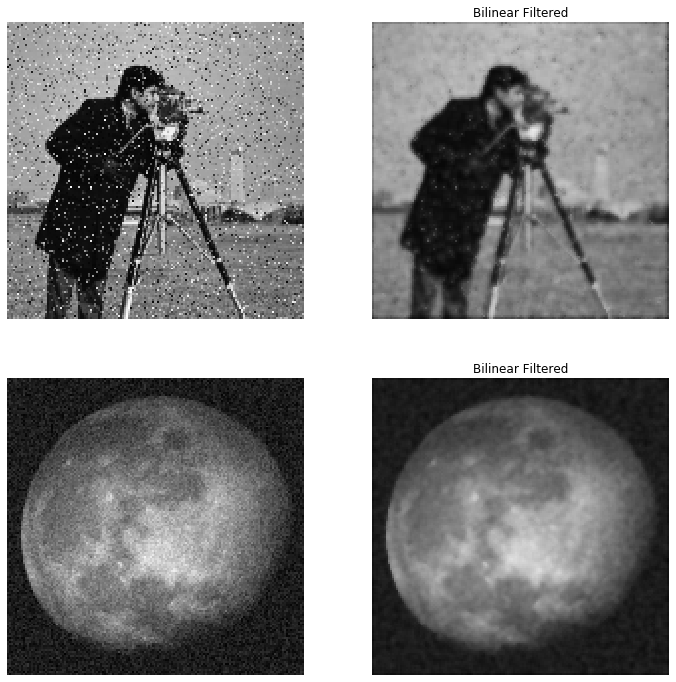

In [3]:
img1 = imageio.imread('images/camera.png')
img2 = imageio.imread('images/moon.png')

img1_filtered = bilateralFilter(img1,4,2.0,150.0)
img2_filtered = bilateralFilter(img2,3,16.0,50.0)

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(222)
plt.imshow(img1_filtered, cmap='gray', vmin=0, vmax=255)
plt.title('Bilinear Filtered')
plt.axis('off')
plt.subplot(223)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(224)
plt.imshow(img2_filtered, cmap='gray', vmin=0, vmax=255)
plt.title('Bilinear Filtered')
plt.axis('off')

### Example - Unsharpen Mask

(-0.5, 249.5, 249.5, -0.5)

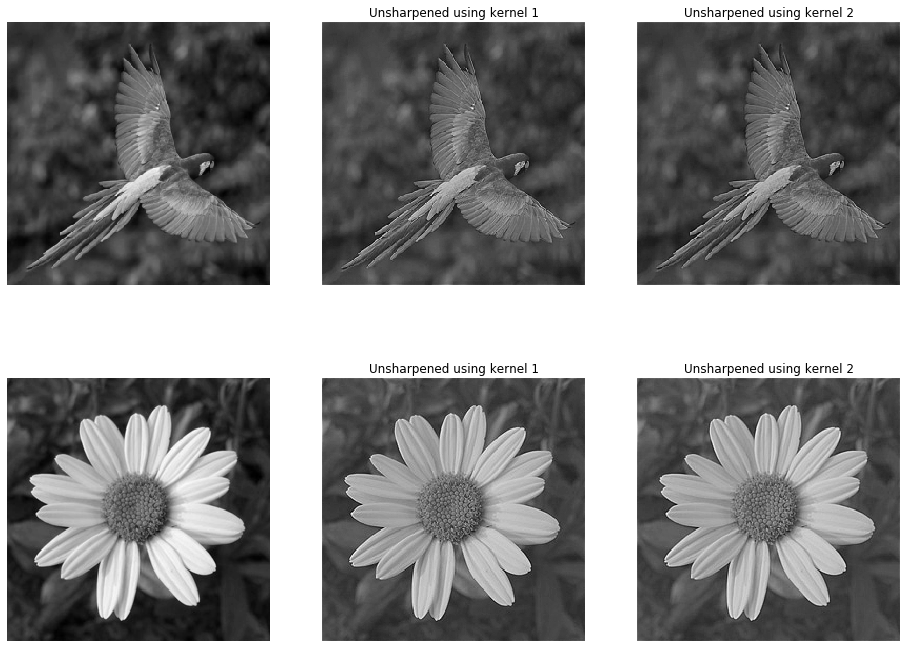

In [4]:
img3 = imageio.imread('images/arara.png')
img4 = imageio.imread('images/flower.png')

kernel_1 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
kernel_2 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

img3_filteredk1 = unsharpenMask(img3, 0.75, kernel_1)
img4_filteredk1 = unsharpenMask(img4, 0.75, kernel_1)
img3_filteredk2 = unsharpenMask(img3, 0.75, kernel_2)
img4_filteredk2 = unsharpenMask(img4, 0.75, kernel_2)

plt.figure(figsize=(16,12))
plt.subplot(231)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(232)
plt.imshow(img3_filteredk1, cmap='gray', vmin=0, vmax=255)
plt.title('Unsharpened using kernel 1')
plt.axis('off')
plt.subplot(233)
plt.imshow(img3_filteredk2, cmap='gray', vmin=0, vmax=255)
plt.title('Unsharpened using kernel 2')
plt.axis('off')
plt.subplot(234)
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(235)
plt.imshow(img4_filteredk1, cmap='gray', vmin=0, vmax=255)
plt.title('Unsharpened using kernel 1')
plt.axis('off')
plt.subplot(236)
plt.imshow(img4_filteredk2, cmap='gray', vmin=0, vmax=255)
plt.title('Unsharpened using kernel 2')
plt.axis('off')

### Example - Vignette

(-0.5, 198.5, 170.5, -0.5)

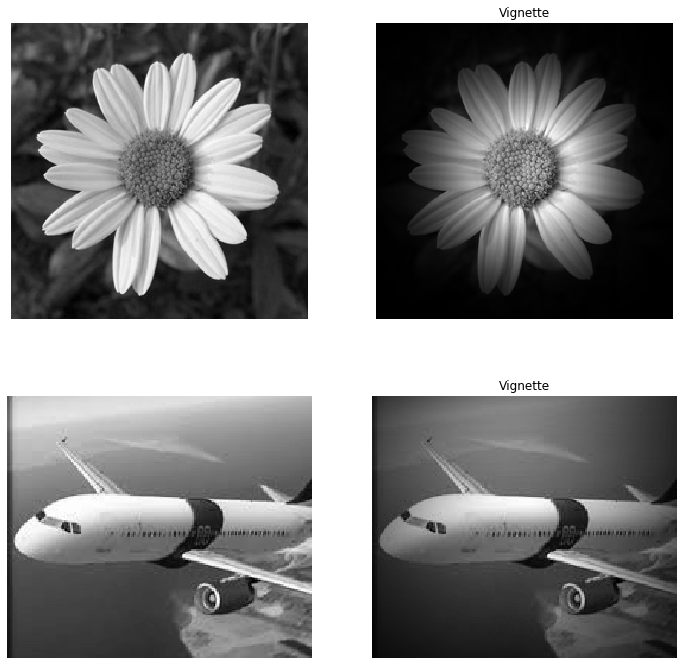

In [5]:
img5 = imageio.imread('images/airplane.png')

img4_vignette = vignette(img4, 50.0, 50.0)
img5_vignette = vignette(img5, 75.0, 75.0)

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(222)
plt.imshow(img4_vignette, cmap='gray', vmin=0, vmax=255)
plt.title('Vignette')
plt.axis('off')
plt.subplot(223)
plt.imshow(img5, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(224)
plt.imshow(img5_vignette, cmap='gray', vmin=0, vmax=255)
plt.title('Vignette')
plt.axis('off')